<a href="https://colab.research.google.com/github/Soham-2004/covid-19/blob/master/R(t).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: ignored

In [2]:
# Load packages
library(tidyverse)

# Plot options

## Jupyter notebooks use the repr package to create viewable representations
## of R objects (https://github.com/IRkernel/repr). I am updating the default
## plot dimensions to 12 x 6.
options(repr.plot.width = 12, repr.plot.height = 6)

## We will use ggplot2 for all plots. I am defining a custom theme here
## that mainly updates the backgrounds and legend position. We set this
## custom theme as the default, and also update the default for line size.
theme_custom <- function(base_size, ...){
  ggplot2::theme_gray(base_size = base_size, ...) +
  ggplot2::theme(
    plot.title = element_text(face = 'bold'),
    plot.subtitle = element_text(color = '#333333'),
    panel.background = element_rect(fill = "#EBF4F7"), 
    strip.background = element_rect(fill = "#33AACC"),
    legend.position = "bottom"
  )
}
ggplot2::theme_set(theme_custom(base_size = 20))
ggplot2::update_geom_defaults("line", list(size = 1.5))

# Utility functions

## We will use a utility function to display the head of dataframes.
## Note that we need this hack mainly to add the class 'dataframe' to 
## the tables that are printed. This should ideally be handled 
## by the `repr` package, and I will be sending a PR.
display_df <- function(x){
  d <- as.character(
    knitr::kable(x, format = 'html', table.attr = "class='dataframe'")
  )
  IRdisplay::display_html(d)
}

display_head <- function(x, n = 6){
   display_df(head(x, n))
}

display_random <- function(x, n = 6){
   display_df(dplyr::sample_n(x, n))
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Number of new cases observed in a day
k = 0:69

# Arrival rate of new infections per day
lambda = c(10, 20, 30, 40)

poisson_densities = crossing(lambda = lambda, k = k) %>%
  mutate(p = dpois(k, lambda))

display_head(poisson_densities)

lambda,k,p
10,0,0.0000454
10,1,0.0004540
10,2,0.0022700
10,3,0.0075667
10,4,0.0189166
10,5,0.0378333


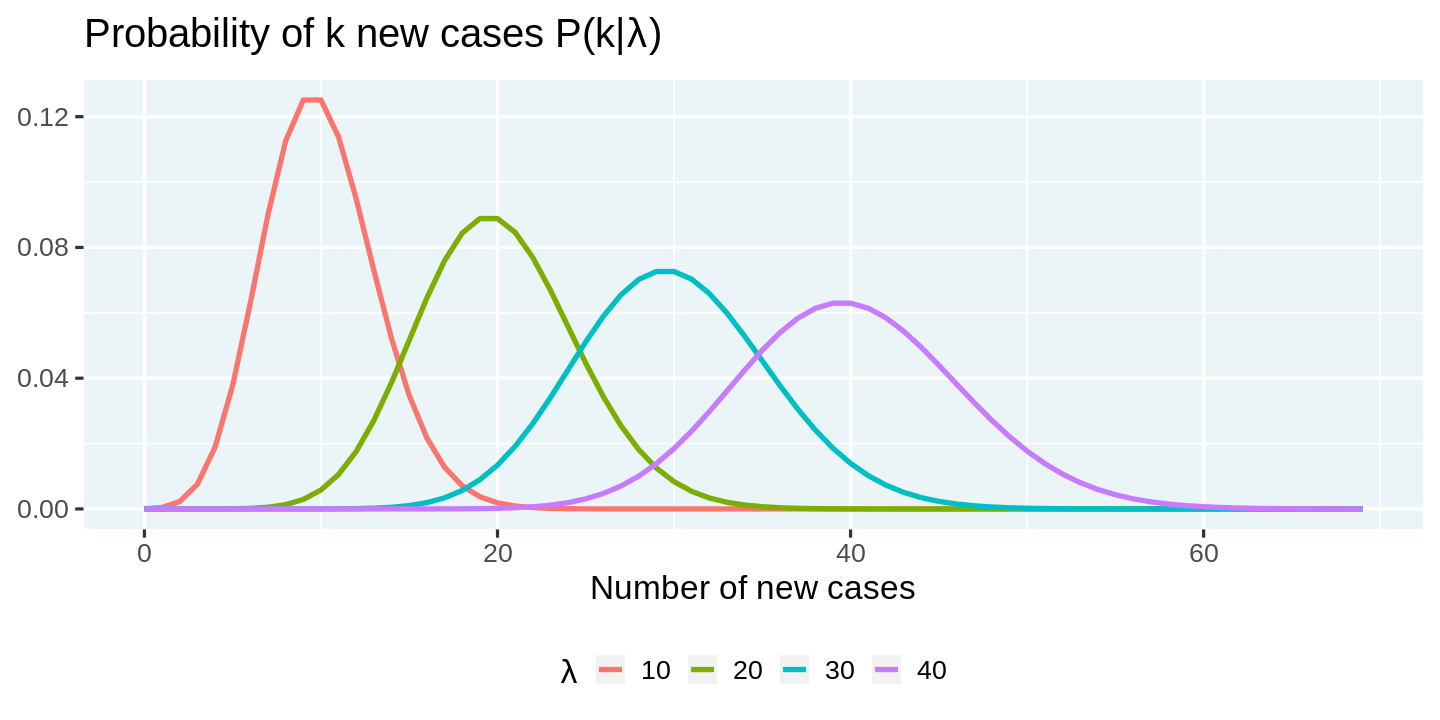

In [4]:
poisson_densities %>% 
  # We convert lambda to a factor so that each line gets a discrete color
  mutate(lambda = factor(lambda)) %>% 
  ggplot(aes(x = k, y = p, color = lambda)) +
  geom_line() +
  labs(
    title = expression(paste("Probability of k new cases P(k|", lambda, ")")),
    x = 'Number of new cases',
    y = NULL,
    color = expression(lambda)
  )

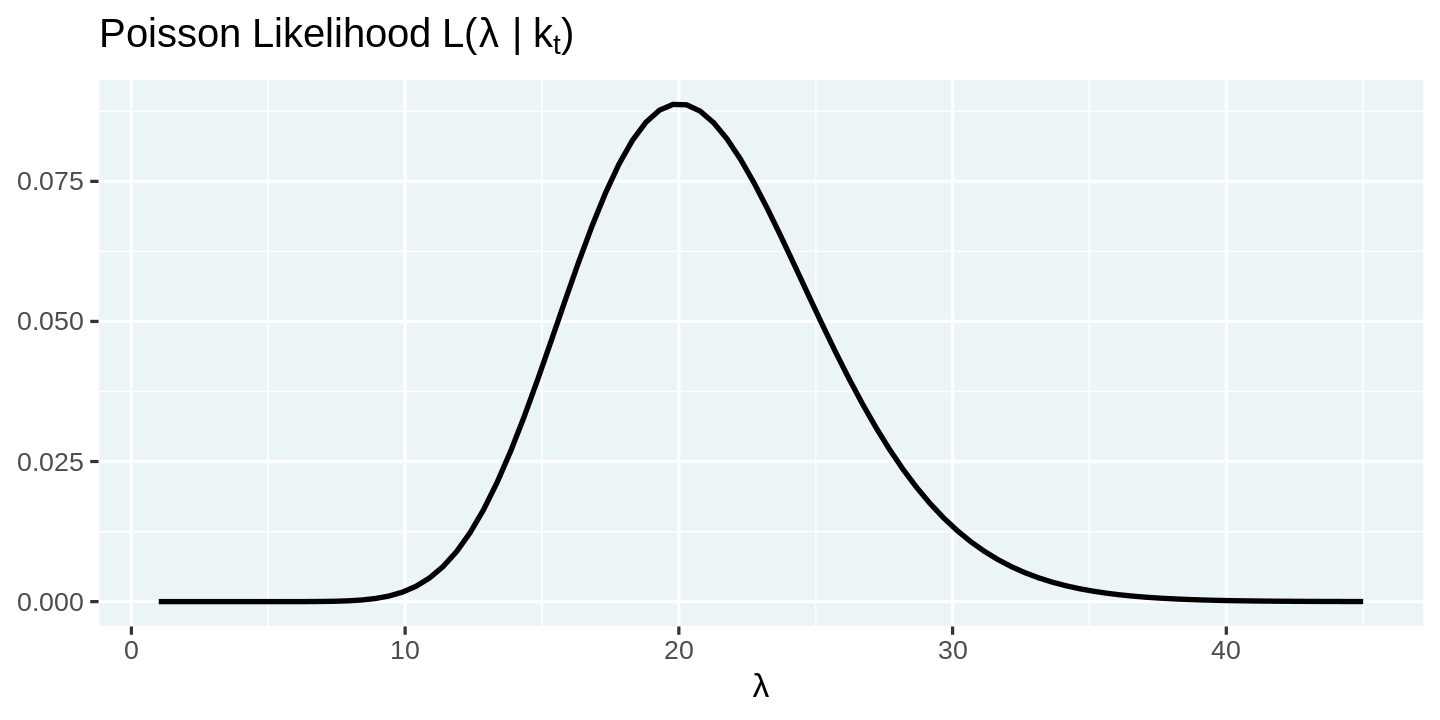

In [5]:
# Number of new cases observed in a day
k = 20

# Arrival rates of new infections per day
lambdas = seq(1, 45, length = 90)

# Compute likelihood and visualize them
tibble(lambda = lambdas, p = dpois(k, lambdas)) %>% 
  ggplot(aes(x = lambda, y = p)) +
  geom_line(color = 'black') +
  labs(
    title = expression(paste("Poisson Likelihood L(", lambda, " | k"[t], ")")),
    x = expression(lambda),
    y = NULL
  ) 

In [65]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
covid_cases <- readr::read_csv('state.csv')
 
display_head(covid_cases)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  state = col_character(),
  cases = col_double(),
  Recovered = col_double(),
  Deceased = col_double(),
  Other = col_double()
)



date,state,cases,Recovered,Deceased,Other
2020-03-04,Delhi,1,0,0,0
2020-03-04,Haryana,14,0,0,0
2020-03-04,Kerala,3,3,0,0
2020-03-04,Rajasthan,2,0,0,0
2020-03-04,Telangana,1,0,0,0
2020-03-04,India,28,3,0,0


In [66]:
# Install the smoother package
install.packages("smoother")

#' Compute new cases and smooth them
smooth_new_cases <- function(cases){
  cases %>% 
    arrange(date) %>%
    mutate(new_cases = c(cases[1], diff(cases))) %>% 
    mutate(new_cases_smooth = round(
      smoother::smth(new_cases, window = 7, tails = TRUE)
    )) %>%
    select(state, date, new_cases, new_cases_smooth)
}

state_selected <- "India"
covid_cases %>% 
  filter(state == state_selected) %>%
  smooth_new_cases() %>%
  display_head(20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



state,date,new_cases,new_cases_smooth
India,2020-03-04,28,14
India,2020-03-05,2,9
India,2020-03-06,1,5
India,2020-03-07,3,5
India,2020-03-08,5,6
India,2020-03-09,9,9
India,2020-03-10,15,10
India,2020-03-11,8,10
India,2020-03-12,10,10
India,2020-03-13,10,10


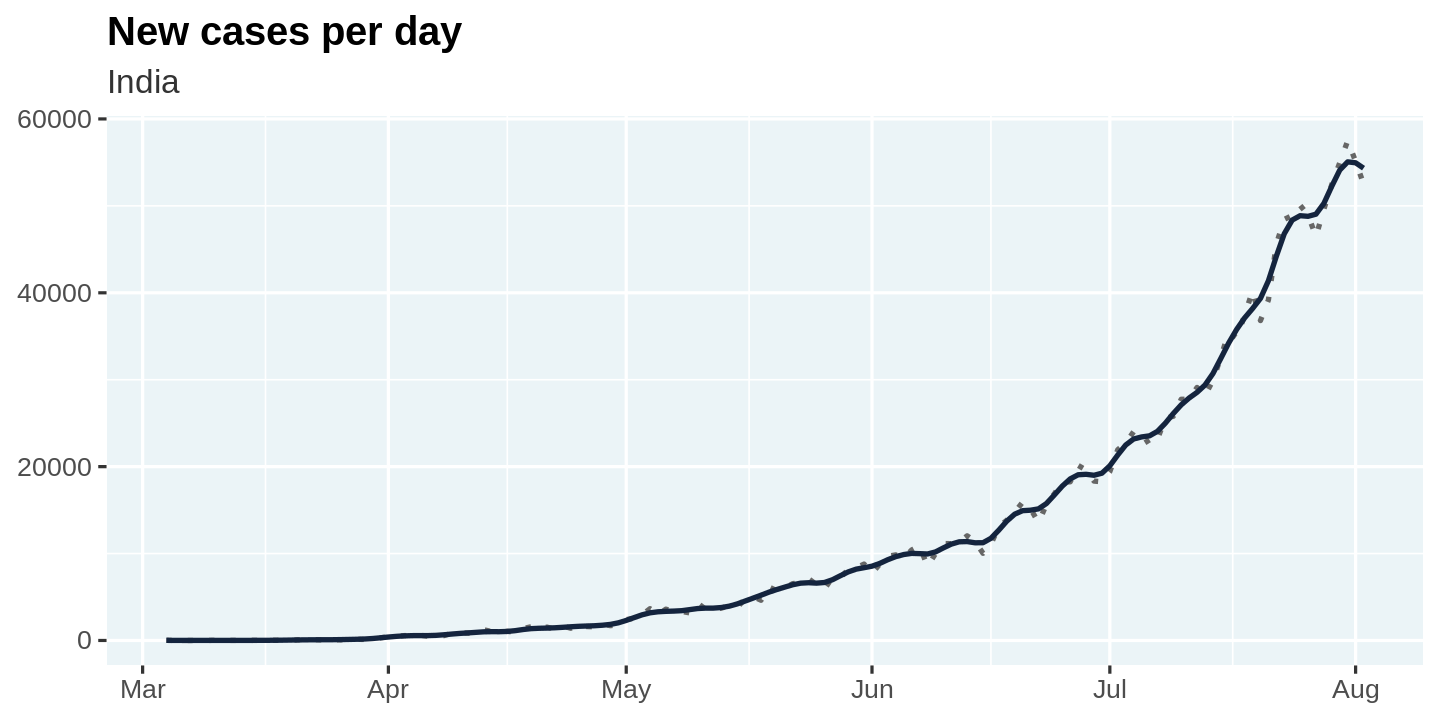

In [67]:
plot_new_cases <- function(cases){
  cases %>%
    ggplot(aes(x = date, y = new_cases)) +
    geom_line(linetype = 'dotted', color = 'gray40') +
    geom_line(aes(y = new_cases_smooth), color = "#14243e") +
    labs(
      title = "New cases per day",
      subtitle = unique(cases$state),
      x = NULL, y = NULL
    )
}

covid_cases %>% 
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  plot_new_cases()

In [68]:
# r_t_range is a vector of possible values for R_t
R_T_MAX = 12
r_t_range = seq(0, R_T_MAX, length = R_T_MAX*100 + 1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article
GAMMA = 1/4

# New cases by day
k =  c(20, 40, 55, 90)

In [70]:
compute_likelihood <- function(cases){
  likelihood <- cases %>%
    filter(new_cases_smooth > 0) %>% 
    arrange(date) %>%
    crossing(r_t = r_t_range) %>% 
    group_by(r_t) %>% 
    mutate(lambda = lag(new_cases_smooth, 1) * exp(GAMMA * (r_t - 1))) %>%
    ungroup() %>%
    mutate(likelihood_r_t = dpois(new_cases_smooth, lambda, log = TRUE)) %>% 
    filter(date > min(date))
}
  
covid_cases %>% 
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  compute_likelihood() %>%
  display_random()

state,date,new_cases,new_cases_smooth,r_t,lambda,likelihood_r_t
India,2020-05-16,4794,4539,3.78,8427.600,-1084.9721
India,2020-06-22,13560,15140,8.42,95798.773,-52732.5730
India,2020-05-12,3562,3724,11.19,47536.244,-34333.3853
India,2020-06-25,18205,17760,7.47,84387.605,-38954.9574
India,2020-06-01,7723,8548,0.38,7170.764,-129.9661
India,2020-08-02,52531,54336,5.75,180190.508,-60721.3776


In [71]:
compute_posterior <- function(likelihood){
  likelihood %>% 
    arrange(date) %>% 
    group_by(r_t) %>% 
    mutate(posterior = exp(
      zoo::rollapplyr(likelihood_r_t, 7, sum, partial = TRUE)
    )) %>% 
    group_by(date) %>% 
    mutate(posterior = posterior / sum(posterior, na.rm = TRUE)) %>% 
    # HACK: NaNs in the posterior create issues later on. So we remove them.
    mutate(posterior = ifelse(is.nan(posterior), 0, posterior)) %>%
    ungroup() %>%
    select(-likelihood_r_t)
}

covid_cases %>%
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  compute_likelihood() %>% 
  compute_posterior() %>%
  display_random()

state,date,new_cases,new_cases_smooth,r_t,lambda,posterior
India,2020-03-17,20,20,7.02,72.06646,0
India,2020-07-10,27749,27106,1.94,33021.70832,0
India,2020-07-25,50072,48869,8.06,282527.64710,0
India,2020-04-15,886,1009,5.27,2942.99736,0
India,2020-04-04,579,557,2.28,728.50059,0
India,2020-04-01,424,397,8.25,1886.72874,0


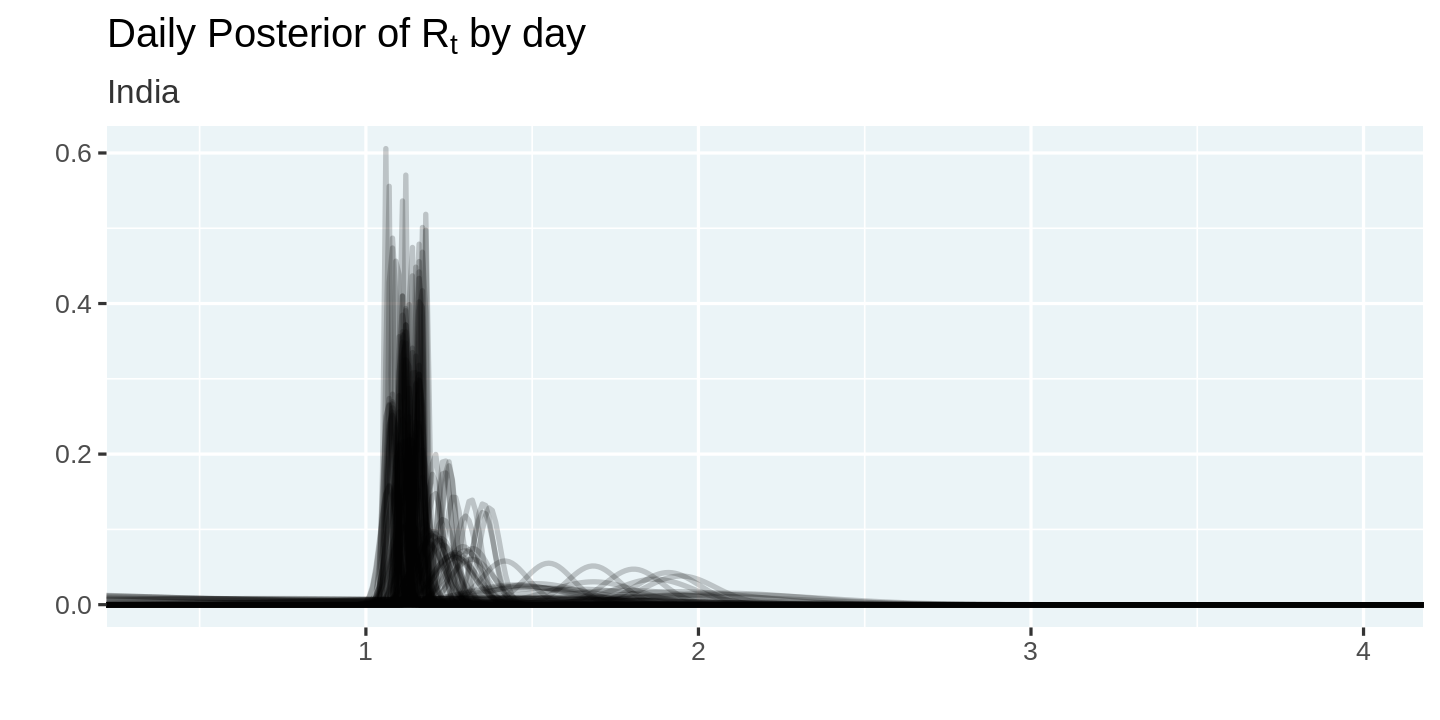

In [72]:
plot_posteriors <- function(posteriors){
  posteriors %>% 
    ggplot(aes(x = r_t, y = posterior, group = date)) +
    geom_line(alpha = 0.2) +
    labs(
      title = expression(paste("Daily Posterior of R"[t], " by day")),
      subtitle = unique(posteriors$state),
      x = '',
      y = ''
    ) +
    coord_cartesian(xlim = c(0.4, 4)) +
    theme(legend.position = 'none')
}

covid_cases %>%
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  compute_likelihood() %>% 
  compute_posterior() %>% 
  plot_posteriors()

In [73]:
# Install and load HDInterval package
install.packages("HDInterval")
library(HDInterval)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
# Estimate R_t and a 95% highest-density interval around it
estimate_rt <- function(posteriors){
  posteriors %>% 
    group_by(state, date) %>% 
    summarize(
      r_t_simulated = list(sample(r_t_range, 10000, replace = TRUE, prob = posterior)),
      r_t_most_likely = r_t_range[which.max(posterior)]
    ) %>% 
    mutate(
      r_t_lo = map_dbl(r_t_simulated, ~ hdi(.x)[1]),
      r_t_hi = map_dbl(r_t_simulated, ~ hdi(.x)[2])
    ) %>% 
    select(-r_t_simulated) 
}
 
covid_cases %>%
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  compute_likelihood() %>% 
  compute_posterior() %>% 
  estimate_rt() %>%
  display_random()

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,date,r_t_most_likely,r_t_lo,r_t_hi
India,2020-06-13,1.07,1.05,1.10
India,2020-04-10,1.26,1.14,1.37
India,2020-06-21,1.16,1.13,1.18
India,2020-03-12,1.07,0.07,1.94
India,2020-03-08,0.00,0.00,1.36
India,2020-06-06,1.11,1.08,1.14


`summarise()` regrouping output by 'state' (override with `.groups` argument)



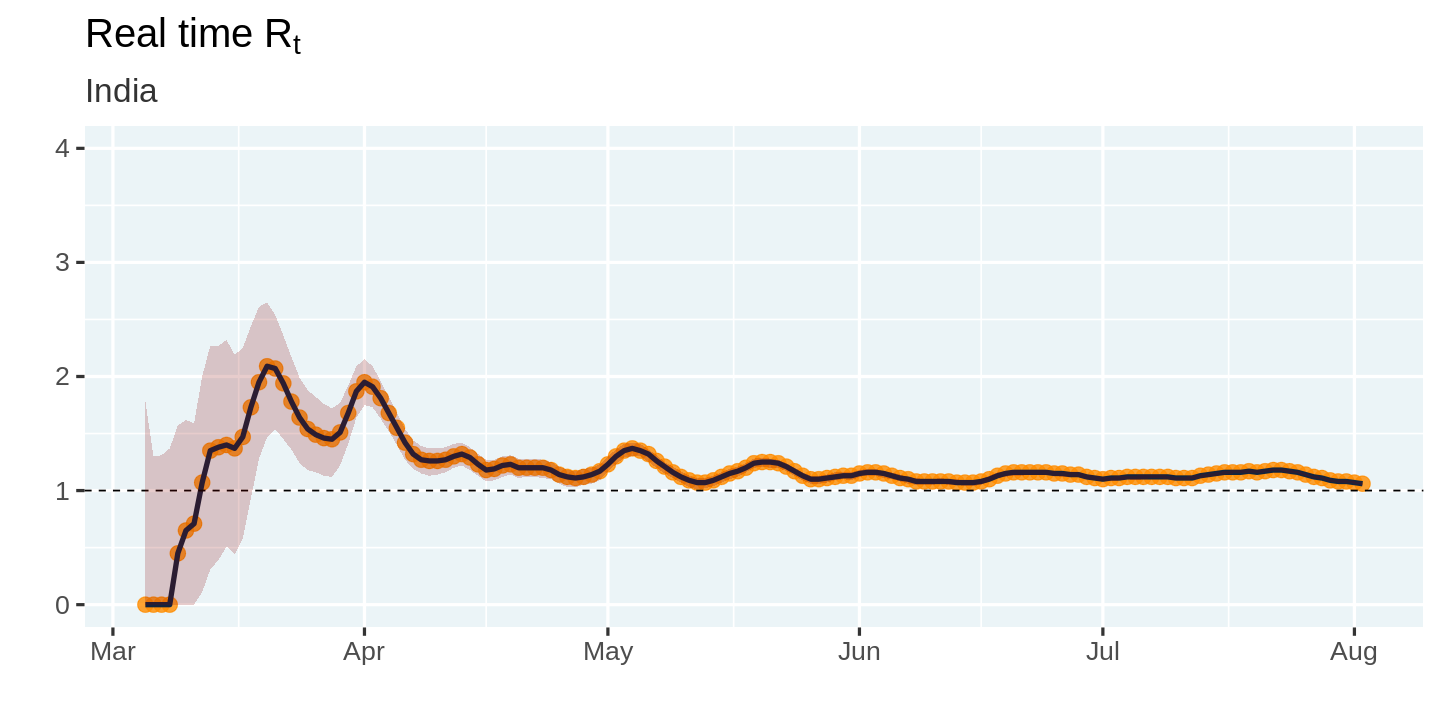

In [75]:
plot_estimates <- function(estimates){
  estimates %>% 
    ggplot(aes(x = date, y = r_t_most_likely)) +
    geom_point(color = "darkorange", alpha = 0.8, size = 4) +
    geom_line(color = "#14243e") +
    geom_hline(yintercept = 1, linetype = 'dashed') +
    geom_ribbon(
      aes(ymin = r_t_lo, ymax = r_t_hi), 
      fill = 'darkred', 
      alpha = 0.2
    ) +
    labs(
      title = expression('Real time R'[t]), x = '', y = '',
      subtitle = unique(estimates$state)
    ) +
    coord_cartesian(ylim = c(0, 4))
}

covid_cases %>%
  filter(state == state_selected) %>% 
  smooth_new_cases() %>% 
  compute_likelihood() %>% 
  compute_posterior() %>% 
  estimate_rt() %>% 
  plot_estimates()

In [76]:
# ⚠️This function can take a couple of minutes to run
#   as it loops across all states
estimates_all <- covid_cases %>% 
  filter(date >= "2020-03-01") %>% 
  group_by(state) %>%
  # Ignore states that have not reached 100 infections
  filter(max(cases) > 100 ) %>% 
  group_split() %>% 
  map_df(~ {
    .x %>% 
      smooth_new_cases() %>% 
      compute_likelihood() %>% 
      compute_posterior() %>% 
      estimate_rt()
  }) %>%
  ungroup()

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override

In [77]:
estimates_all %>%
  display_random()

state,date,r_t_most_likely,r_t_lo,r_t_hi
Andhra Pradesh,2020-04-11,0.67,0.09,1.17
Jammu and Kashmir,2020-04-28,1.09,0.52,1.68
India,2020-03-12,1.07,0.03,1.94
Delhi,2020-03-19,1.80,0.00,3.58
Jharkhand,2020-06-17,0.37,0.00,0.71
Madhya Pradesh,2020-07-05,1.28,1.09,1.45


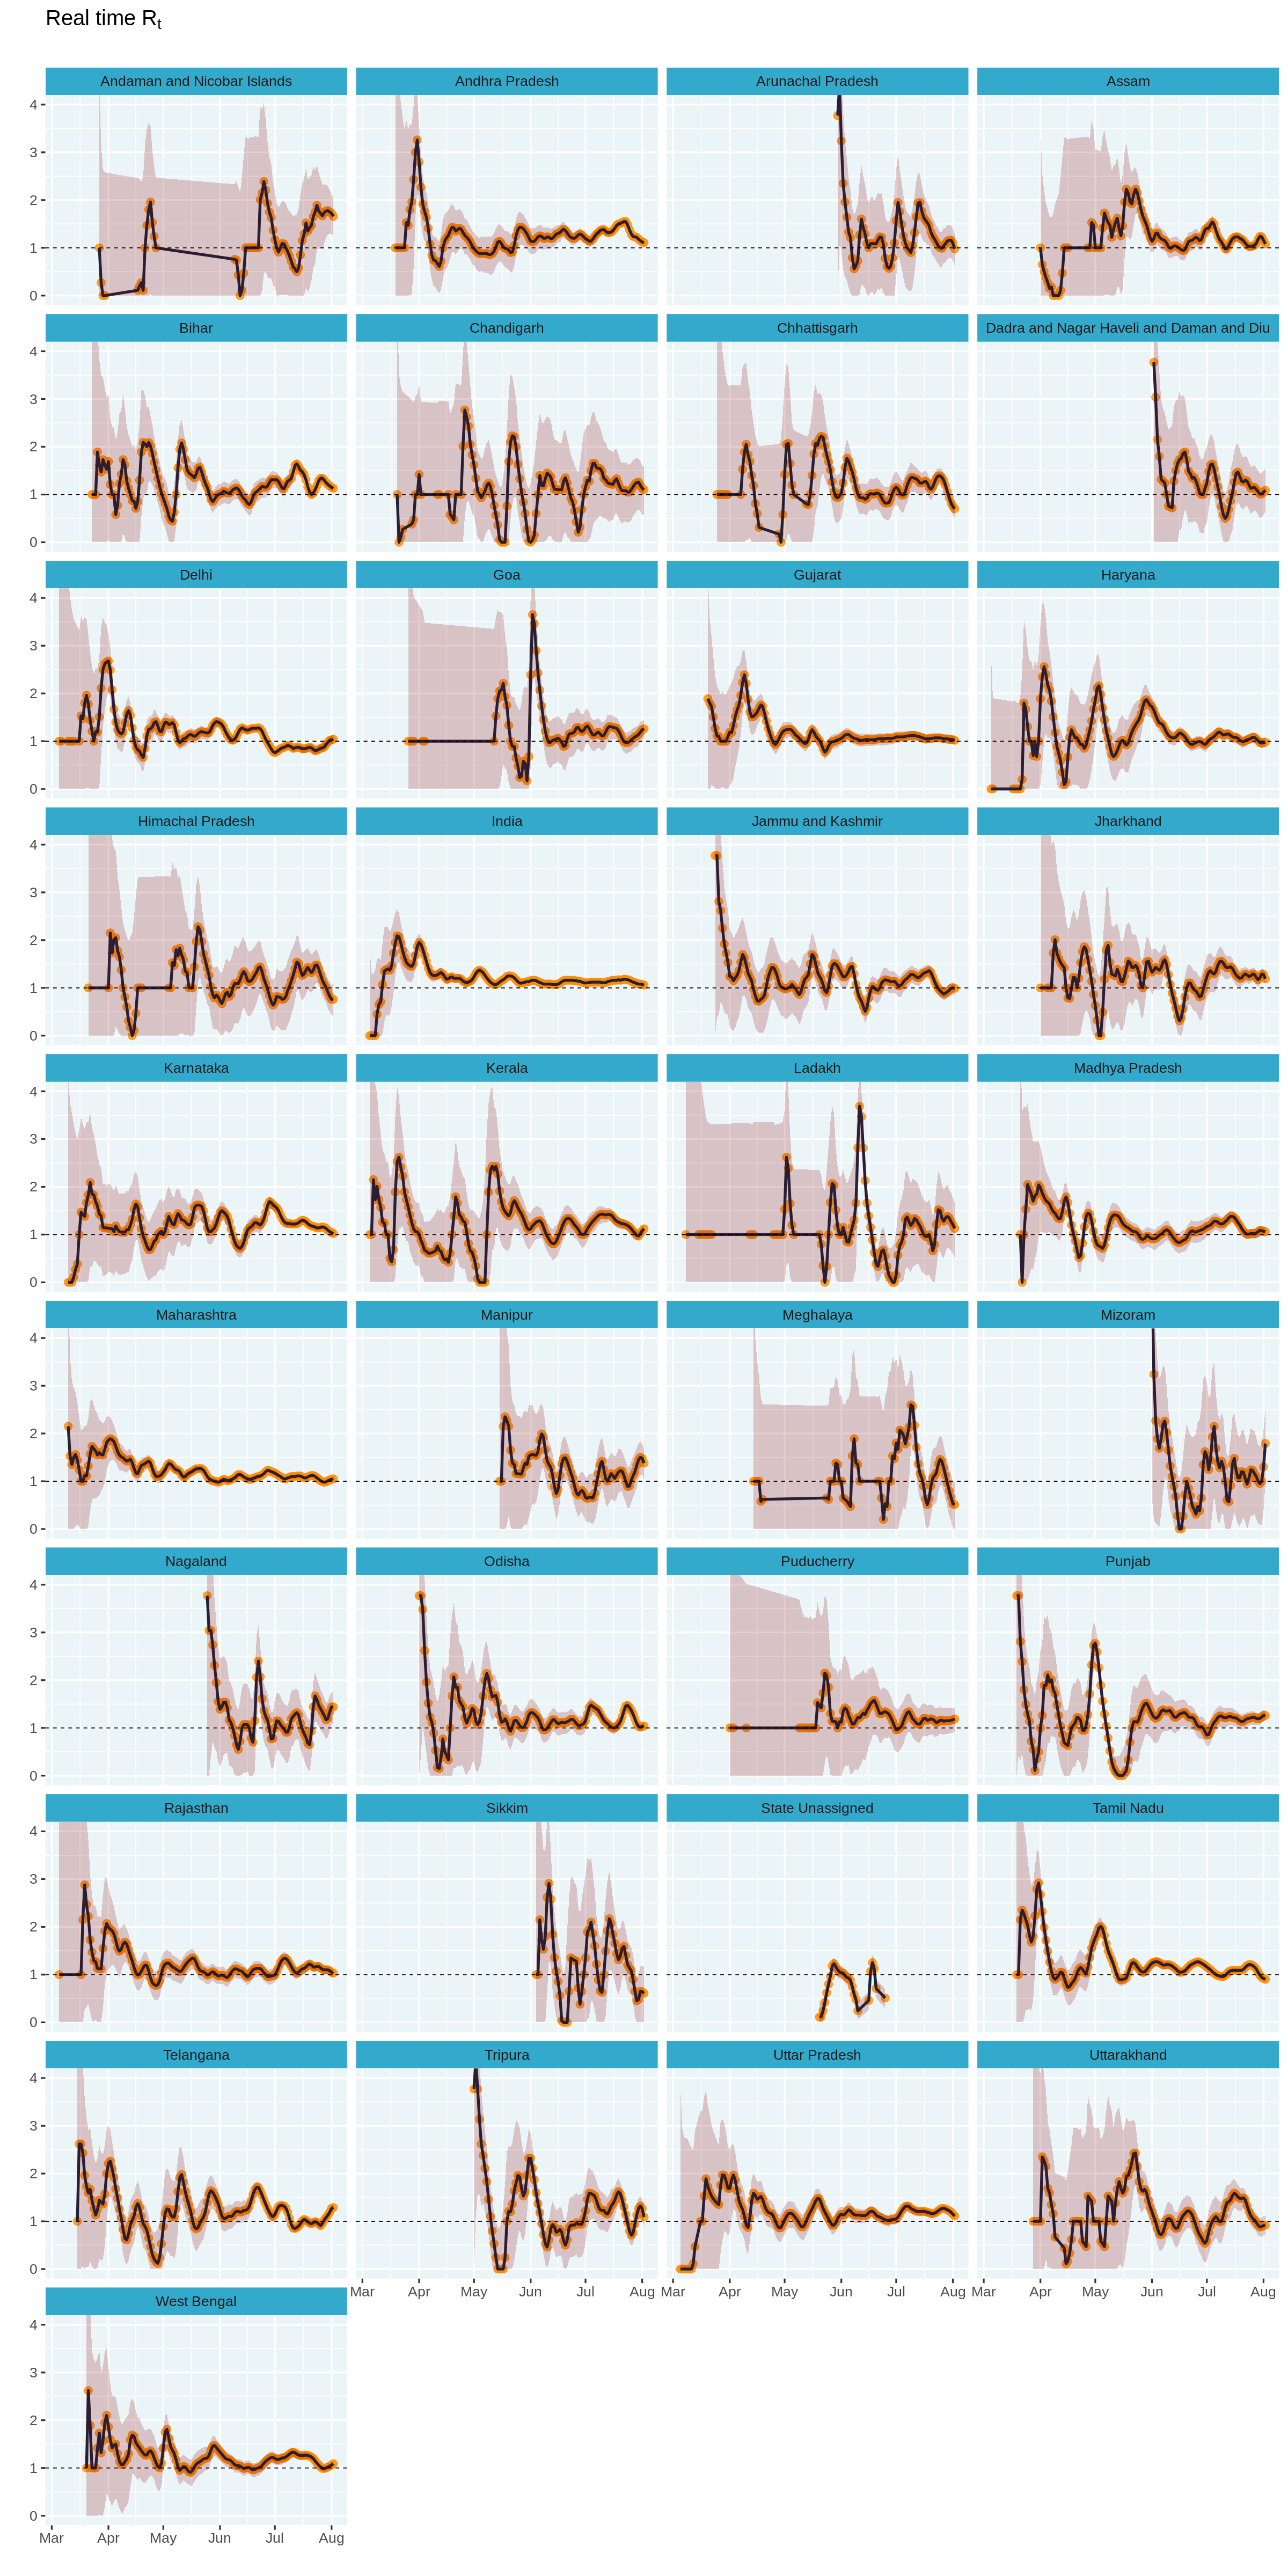

In [78]:
# Increase plot height and width
options(repr.plot.height = 40, repr.plot.width = 20)
estimates_all %>% 
  plot_estimates() +
  facet_wrap(~ state, ncol = 4) +
  labs(subtitle = "")

# Reset plot dimensions
options(repr.plot.height = 12, repr.plot.width = 8)